In [1]:
import sys
sys.path.append('../')

91 reference embeddings have been loaded from pickle file: ../.cache/reference_embeddings.pkl


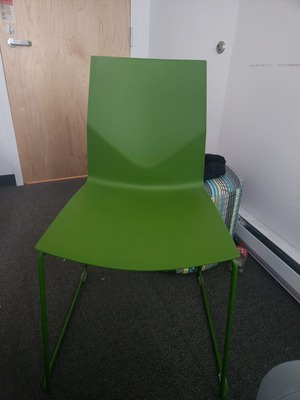

           chair: 65.47%
           table: 21.14%
             bus: 11.58%
             car: 1.37%
             cup: 0.44%


In [2]:
from PIL import Image
from IPython.display import display
from src.zero_shot_classifier import ZeroShotClassifier
from src.vlm.clip_vlm import Clip
from src.vlm.raclip_vanilla import RaClipVanilla
from src.vlm.raclip import RaClip

clf = ZeroShotClassifier()
model = RaClip()

image = Image.open("../resources/images/chair.jpeg")
display(image)
clf.predict(model, image, ["table", "chair", "cup", "bus", "car"])

In [3]:
from src import utils
from torchvision.datasets import CIFAR100, CIFAR10, Caltech101

cifar10_testset = CIFAR10(root='../.cache/datasets', download=True, train=False, transform=utils.clip_preprocess)
model_name, dataset_name, accuracy = clf.evaluate_testset(model, cifar10_testset, cifar10_testset.classes)
utils.save_result(model_name, dataset_name, accuracy)

cifar100_testset = CIFAR100(root='../.cache/datasets', download=True, train=False, transform=utils.clip_preprocess)
model_name, dataset_name, accuracy = clf.evaluate_testset(model, cifar100_testset, cifar100_testset.classes)
utils.save_result(model_name, dataset_name, accuracy)

caltech101_testset = Caltech101(root='../.cache/datasets', download=True, transform=utils.clip_preprocess)
model_name, dataset_name, accuracy = clf.evaluate_testset(model, caltech101_testset, caltech101_testset.categories)
utils.save_result(model_name, dataset_name, accuracy)

Files already downloaded and verified


100%|██████████| 100/100 [01:44<00:00,  1.04s/it]


RaClip accuracy on CIFAR10: 48.28
Files already downloaded and verified


100%|██████████| 100/100 [01:44<00:00,  1.04s/it]


RaClip accuracy on CIFAR100: 12.91
Files already downloaded and verified


100%|██████████| 87/87 [01:39<00:00,  1.14s/it]

RaClip accuracy on Caltech101: 16.15


In [4]:
import src.utils as utils

# utils.clear_results()
utils.display_results()

╒════════════╤════════╤══════════════════╤══════════╕
│            │   Clip │   RaClip Vanilla │   RaClip │
╞════════════╪════════╪══════════════════╪══════════╡
│ CIFAR10    │  88.8  │            80.93 │    48.28 │
├────────────┼────────┼──────────────────┼──────────┤
│ CIFAR100   │  61.71 │            50.48 │    12.91 │
├────────────┼────────┼──────────────────┼──────────┤
│ Caltech101 │  85.01 │            77.56 │    16.15 │
╘════════════╧════════╧══════════════════╧══════════╛
